In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
all_xray_df = pd.read_csv('/kaggle/input/data/Data_Entry_2017.csv')
all_image_paths = {os.path.basename(x): x for x in 
                   glob(os.path.join('..', 'input', 'data', 'images*', '*', '*.png'))}
print('Scans found:', len(all_image_paths), ', Total Headers', all_xray_df.shape[0])
all_xray_df['path'] = all_xray_df['Image Index'].map(all_image_paths.get)
all_xray_df['path'] = all_xray_df['Image Index'].map(all_image_paths.get)

all_xray_df.sample(3)

Scans found: 112120 , Total Headers 112120


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11,path
93433,00023371_000.png,No Finding,0,23371,24,F,AP,2048,2500,0.168,0.168,NaN,../input/data/images_010/images/00023371_000.png
99609,00026374_011.png,Infiltration,11,26374,87,M,PA,2992,2991,0.143,0.143,NaN,../input/data/images_011/images/00026374_011.png
53339,00013471_000.png,Atelectasis,0,13471,63,M,AP,2500,2048,0.168,0.168,NaN,../input/data/images_006/images/00013471_000.png


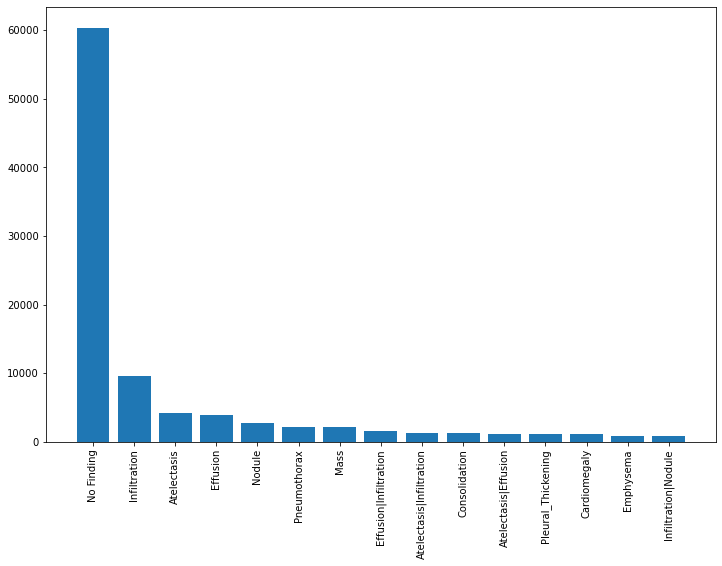

In [3]:
label_counts = all_xray_df['Finding Labels'].value_counts()[:15]
fig, ax1 = plt.subplots(1,1,figsize = (12, 8))
ax1.bar(np.arange(len(label_counts))+0.5, label_counts)
ax1.set_xticks(np.arange(len(label_counts))+0.5)
_ = ax1.set_xticklabels(label_counts.index, rotation = 90)

In [4]:
all_xray_df['Finding Labels'] = all_xray_df['Finding Labels'].map(lambda x: x.replace('No Finding', ''))
from itertools import chain
all_labels = np.unique(list(chain(*all_xray_df['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x)>0]
print('All Labels ({}): {}'.format(len(all_labels), all_labels))
for c_label in all_labels:
    if len(c_label)>1: # leave out empty labels
        all_xray_df[c_label] = all_xray_df['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)
all_xray_df.sample(20)

All Labels (14): ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
24621,00006475_000.png,,0,6475,58,M,PA,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11976,00003125_001.png,,1,3125,58,F,PA,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76909,00018883_006.png,,6,18883,51,M,PA,3056,2544,0.139,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
109324,00029727_003.png,Atelectasis|Consolidation|Mass,3,29727,68,F,AP,3056,2544,0.139,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
55115,00013807_001.png,,1,13807,63,F,PA,2992,2991,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36262,00009574_030.png,,30,9574,57,M,PA,2670,2991,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90426,00022498_000.png,,0,22498,49,F,PA,2992,2991,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70743,00017445_004.png,,4,17445,60,M,PA,2746,2742,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4820,00001296_001.png,,1,1296,59,M,PA,2992,2991,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51323,00012971_001.png,Edema|Effusion,1,12971,63,M,AP,2500,2048,0.168,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
MIN_CASES = 1000
all_labels = [c_label for c_label in all_labels if all_xray_df[c_label].sum()>MIN_CASES]
print('Clean Labels ({})'.format(len(all_labels)), 
      [(c_label,int(all_xray_df[c_label].sum())) for c_label in all_labels])

Clean Labels (13) [('Atelectasis', 11559), ('Cardiomegaly', 2776), ('Consolidation', 4667), ('Edema', 2303), ('Effusion', 13317), ('Emphysema', 2516), ('Fibrosis', 1686), ('Infiltration', 19894), ('Mass', 5782), ('Nodule', 6331), ('Pleural_Thickening', 3385), ('Pneumonia', 1431), ('Pneumothorax', 5302)]


In [6]:
all_xray_df['disease_vec'] = all_xray_df.apply(lambda x: [x[all_labels].values], 1).map(lambda x: x[0])

In [7]:
from sklearn.model_selection import train_test_split
train_df, valid_df = train_test_split(all_xray_df, 
                                   test_size = 0.25, 
                                   random_state = 2018,
                                   stratify = all_xray_df['Finding Labels'].map(lambda x: x[:4]))
print('train', train_df.shape[0], 'validation', valid_df.shape[0])

train 84090 validation 28030


In [8]:
valid_df['newLabel'] = valid_df.apply(lambda x: x['Finding Labels'].split('|'), axis=1)
train_df['newLabel'] = train_df.apply(lambda x: x['Finding Labels'].split('|'), axis=1)

In [9]:
train_df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,disease_vec,newLabel
12685,00003328_003.png,,3,3328,48,M,PA,2500,2048,0.168000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[]
85724,00021147_000.png,,0,21147,63,M,PA,2992,2991,0.143000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[]
35824,00009437_011.png,,11,9437,40,F,PA,2048,2500,0.168000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[]
103894,00027725_068.png,Pneumothorax,68,27725,21,M,AP,3056,2544,0.139000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[Pneumothorax]
89063,00022106_007.png,,7,22106,23,M,AP,2544,3056,0.139000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92120,00022993_027.png,Atelectasis|Nodule,27,22993,59,M,PA,2021,2021,0.194311,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[Atelectasis, Nodule]"
68000,00016794_000.png,,0,16794,43,M,PA,2670,2991,0.143000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[]
18929,00005029_002.png,Infiltration,2,5029,38,M,AP,2500,2048,0.168000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",[Infiltration]
34921,00009218_031.png,,31,9218,40,M,AP,2500,2048,0.168000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[]


In [10]:
train_df['path']

12685     ../input/data/images_002/images/00003328_003.png
85724     ../input/data/images_010/images/00021147_000.png
35824     ../input/data/images_005/images/00009437_011.png
103894    ../input/data/images_011/images/00027725_068.png
89063     ../input/data/images_010/images/00022106_007.png
                                ...                       
92120     ../input/data/images_010/images/00022993_027.png
68000     ../input/data/images_008/images/00016794_000.png
18929     ../input/data/images_003/images/00005029_002.png
34921     ../input/data/images_004/images/00009218_031.png
104520    ../input/data/images_011/images/00027952_003.png
Name: path, Length: 84090, dtype: object

In [11]:
from keras.preprocessing.image import ImageDataGenerator
IMG_SIZE = (128, 128)
core_idg = ImageDataGenerator(samplewise_center=True, 
                              samplewise_std_normalization=True, 
                              horizontal_flip = True, 
                              vertical_flip = False, 
                              height_shift_range= 0.05, 
                              width_shift_range=0.1, 
                              rotation_range=5, 
                              shear_range = 0.1,
                              
                              zoom_range=0.15)

In [12]:
train_gen = core_idg.flow_from_dataframe(dataframe=train_df, 
                             directory=None,
                             x_col = 'path',
                            y_col = 'newLabel', 
                             class_mode = 'categorical',
                            classes = all_labels,
                            target_size = IMG_SIZE,
                             color_mode = 'grayscale',
                            batch_size = 32)

Found 38736 validated image filenames belonging to 13 classes.


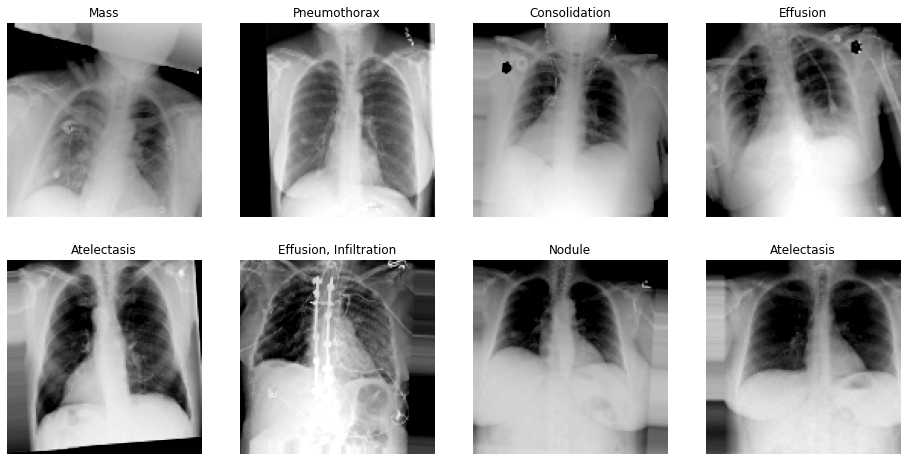

In [13]:
t_x, t_y = next(train_gen)
fig, m_axs = plt.subplots(2, 4, figsize = (16, 8))
for (c_x, c_y, c_ax) in zip(t_x, t_y, m_axs.flatten()):
    c_ax.imshow(c_x[:,:,0], cmap = 'gray', vmin = -1.5, vmax = 1.5)
    c_ax.set_title(', '.join([n_class for n_class, n_score in zip(all_labels, c_y) 
                             if n_score>0.5]))
    c_ax.axis('off')

In [14]:
import numpy as np, pandas as pd
from glob import glob
import shutil, os
import matplotlib.pyplot as plt
from sklearn.model_selection import GroupKFold
from tqdm.notebook import tqdm
import seaborn as sns

In [15]:
all_xray_df['label_id'] = 15
all_xray_df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,disease_vec,label_id
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",15
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",15
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",15
3,00000002_000.png,,0,2,81,M,PA,2500,2048,0.171,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",15
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,39,M,PA,2048,2500,0.168,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",15
112116,00030802_000.png,,0,30802,29,M,PA,2048,2500,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",15
112117,00030803_000.png,,0,30803,42,F,PA,2048,2500,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",15
112118,00030804_000.png,,0,30804,30,F,PA,2048,2500,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",15


In [16]:
all_xray_df["label_id"].mask(all_xray_df["Finding Labels"] == "No Finding", 0, inplace=True)
all_xray_df["label_id"].mask(all_xray_df["Finding Labels"] == "Infiltration", 1, inplace=True)
all_xray_df["label_id"].mask(all_xray_df["Finding Labels"] == "Atelectasis", 2, inplace=True)
all_xray_df["label_id"].mask(all_xray_df["Finding Labels"] == "Effusion", 3, inplace=True)
all_xray_df["label_id"].mask(all_xray_df["Finding Labels"] == "Nodule", 4, inplace=True)
all_xray_df["label_id"].mask(all_xray_df["Finding Labels"] == "Pneumothorax", 5, inplace=True)
all_xray_df["label_id"].mask(all_xray_df["Finding Labels"] == "Mass", 6, inplace=True)
all_xray_df["label_id"].mask(all_xray_df["Finding Labels"] == "Consolidation", 7, inplace=True)
all_xray_df["label_id"].mask(all_xray_df["Finding Labels"] == "Pleural_Thickening", 8, inplace=True)
all_xray_df["label_id"].mask(all_xray_df["Finding Labels"] == "Cardiomegaly", 9, inplace=True)
all_xray_df["label_id"].mask(all_xray_df["Finding Labels"] == "Emphysema", 10, inplace=True)
all_xray_df["label_id"].mask(all_xray_df["Finding Labels"] == "Fibrosis", 11, inplace=True)
all_xray_df["label_id"].mask(all_xray_df["Finding Labels"] == "Edema", 12, inplace=True)
all_xray_df["label_id"].mask(all_xray_df["Finding Labels"] == "Pneumonia", 13, inplace=True)
all_xray_df["label_id"].mask(all_xray_df["Finding Labels"] == "Hernia", 14, inplace=True)

all_xray_df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,disease_vec,label_id
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",9
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",15
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",15
3,00000002_000.png,,0,2,81,M,PA,2500,2048,0.171,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",15
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,39,M,PA,2048,2500,0.168,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",15
112116,00030802_000.png,,0,30802,29,M,PA,2048,2500,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",15
112117,00030803_000.png,,0,30803,42,F,PA,2048,2500,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",15
112118,00030804_000.png,,0,30804,30,F,PA,2048,2500,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",15


In [17]:
all_xray_df_filtered = all_xray_df[all_xray_df['label_id'] > 0]
all_xray_df_filtered

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,disease_vec,label_id
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",9
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",15
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",15
3,00000002_000.png,,0,2,81,M,PA,2500,2048,0.171,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",15
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,39,M,PA,2048,2500,0.168,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",15
112116,00030802_000.png,,0,30802,29,M,PA,2048,2500,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",15
112117,00030803_000.png,,0,30803,42,F,PA,2048,2500,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",15
112118,00030804_000.png,,0,30804,30,F,PA,2048,2500,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",15


In [18]:
features = ['OriginalImage[Width', 'Height]', 'OriginalImagePixelSpacing[x', 'y]']
X = all_xray_df_filtered[features]
y = all_xray_df_filtered['label_id']
X.shape, y.shape

((112120, 4), (112120,))

In [19]:
for col in all_xray_df_filtered.columns:
    print(col)

Image Index
Finding Labels
Follow-up #
Patient ID
Patient Age
Patient Gender
View Position
OriginalImage[Width
Height]
OriginalImagePixelSpacing[x
y]
Unnamed: 11
path
Atelectasis
Cardiomegaly
Consolidation
Edema
Effusion
Emphysema
Fibrosis
Hernia
Infiltration
Mass
Nodule
Pleural_Thickening
Pneumonia
Pneumothorax
disease_vec
label_id


In [20]:
all_xray_df['Binary Labels'] = all_xray_df['Finding Labels'].map(lambda x: 0.0 if x == 'No Finding' else 1.0)

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2) #OG: 5000
data_X = X
data_y = y.loc[data_X.index]
embs = pca.fit_transform(data_X)
# Add to dataframe for convenience
plot_x = embs[:, 0]
plot_y = embs[:, 1]

ValueError: Expected 2D array, got 1D array instead:
array=[ 9. 15. 15. ... 15. 15. 15.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [22]:
class_ids, class_names = list(zip(*set(zip(all_xray_df.label_id, all_xray_df['Finding Labels']))))
classes = list(np.array(class_names)[np.argsort(class_ids)])
classes = list(map(lambda x: str(x), classes))
classes = classes[1: 14]
classes

['Atelectasis',
 'Effusion',
 'Nodule',
 'Pneumothorax',
 'Mass',
 'Consolidation',
 'Pleural_Thickening',
 'Cardiomegaly',
 'Emphysema',
 'Fibrosis',
 'Edema',
 'Pneumonia',
 'Hernia']

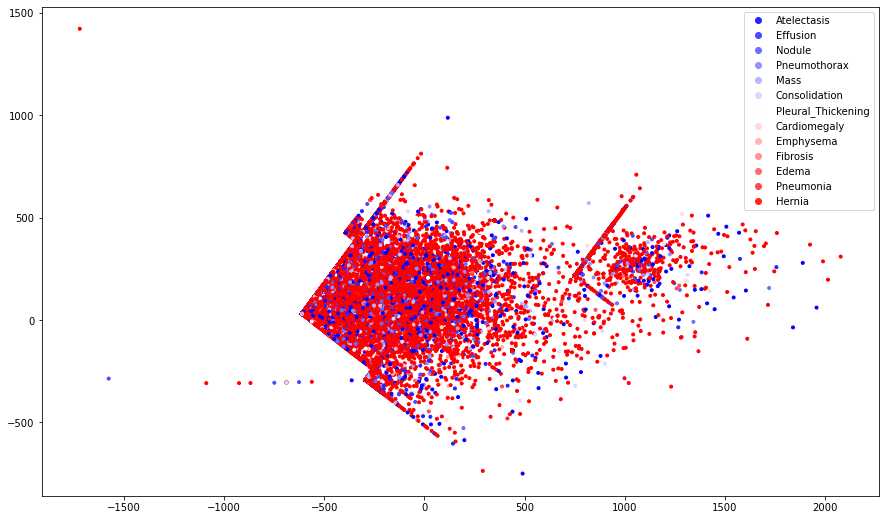

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15, 9))
scatter = plt.scatter(plot_x, plot_y, marker = '.',c=data_y.tolist(),cmap='bwr')
plt.legend(handles=scatter.legend_elements()[0][1:14], labels=classes)

In [9]:
selection = "train" # ~30k images
# selection = "test" # ~400 images 
covid_df = pd.read_csv(f'/kaggle/input/covidx-cxr2/{selection}.txt', sep=' ', header=None, usecols=[1,2], names=['filename', 'label'])
covid_df['path'] = covid_df['filename'].map(lambda x: f"/kaggle/input/covidx-cxr2/{selection}/" + x)
covid_df['Binary Labels'] = covid_df['label'].map(lambda x: 0.0 if x == 'negative' else 1.0)
covid_df

,filename,label,path,Binary Labels
0,ARDSSevere.png,negative,/kaggle/input/covidx-cxr2/train/ARDSSevere.png,0.0
1,acute-respiratory-distress-syndrome-ards-1.jpg,negative,/kaggle/input/covidx-cxr2/train/acute-respirat...,0.0
2,acute-respiratory-distress-syndrome-ards.jpg,negative,/kaggle/input/covidx-cxr2/train/acute-respirat...,0.0
3,ards-secondary-to-tiger-snake-bite.png,negative,/kaggle/input/covidx-cxr2/train/ards-secondary...,0.0
4,pneumocystis-pneumonia-2-PA.png,negative,/kaggle/input/covidx-cxr2/train/pneumocystis-p...,0.0
...,...,...,...,...
29981,55204bb8-89fc-449d-8563-e91654abea9d.png,negative,/kaggle/input/covidx-cxr2/train/55204bb8-89fc-...,0.0
29982,0f4b80b6-fd39-451f-aebf-7cdb1b655c0b.png,negative,/kaggle/input/covidx-cxr2/train/0f4b80b6-fd39-...,0.0
29983,5fb64e85-62ef-4852-8ad1-f799015c8cc3.png,negative,/kaggle/input/covidx-cxr2/train/5fb64e85-62ef-...,0.0
29984,c57ad4fd-3aa8-4ae8-a262-7336360d8265.png,negative,/kaggle/input/covidx-cxr2/train/c57ad4fd-3aa8-...,0.0


In [10]:
features = ['Binary Labels']
X = covid_df[features]

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2) #OG: 5000
data_X = X
data_y = y.loc[data_X.index]
embs = pca.fit_transform(data_X)
# Add to dataframe for convenience
plot_x = embs[:, 0]
plot_y = embs[:, 1]

IndexError: index 1 is out of bounds for axis 1 with size 1

In [ ]:
cell_images = []
for cell_path in covid_df['path']:
    image = cv2.imread(cell_path, cv2.IMREAD_UNCHANGED)
    cell_images.append(image)
cell_images = np.array(cell_images)